## BUSINESS PROBLEM

One company recently introduced a new bidding type, namely “average bidding”, as an alternative to its exisiting bidding type, namely “maximum bidding”. 

Another comapny has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding.

This comapny randomly splits its audience into two equally sized groups, e.g. the test and the control group. 

“maximum bidding” is served as to “control group” and “average bidding” is served as to the “test group”.

The A/B test has run for 1 month and this company expects us to analyze and present the results of this A/B test.

We are also asked to compare these two group by using different metrics, such as Website Click Through Rate, Cost per Action, and Conversion Rates in addition to Number of Purchase

### HYPOTHESES
+ HO: There is no statistically significance difference between average bidding and maximum bidding in terms of the average number of purchase
+ H1: There is statistically significance difference between average bidding and maximum bidding in terms of the average number of purchase

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import levene

## EXPLATORY DATA ANALYSIS

In [180]:
import pandas as pd
xls = pd.ExcelFile('Data_Science_Case_Study.xlsx')
df_c = pd.read_excel(xls, 'Control Group')
df_t = pd.read_excel(xls, 'Test Group')

In [181]:
df_c.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,2017.01.01,2436.124529,90572.0,75440.0,4150.0,1657.0,1541.0,566.0,383.0
1,Control Campaign,2017.01.02,2621.043006,129612.0,95667.0,6387.0,2265.0,1563.0,1577.0,644.0
2,Control Campaign,2017.01.03,2427.021083,132803.0,121762.0,6887.0,3100.0,2048.0,1381.0,639.0
3,Control Campaign,2017.01.04,2565.414978,120570.0,104011.0,6478.0,2579.0,2083.0,1650.0,649.0
4,Control Campaign,2017.01.05,2648.683326,95822.0,69059.0,4532.0,1823.0,1220.0,940.0,455.0


In [182]:
df_t.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,2017.01.01,2335.586267,160244,121551,8223,2989,2949,1371,913
1,Test Campaign,2017.01.02,2899.490621,100793,68241,4972,2162,1388,1253,510
2,Test Campaign,2017.01.03,3031.740149,89525,83450,3514,1365,1251,995,391
3,Test Campaign,2017.01.04,2794.847648,110122,89985,4411,1533,1134,951,434
4,Test Campaign,2017.01.05,2201.845423,122204,84000,5165,1582,1007,810,492


In [183]:
print(df_c.isnull().any().sum())
print(df_t.isnull().any().sum())

10
0


In [184]:
# Dropping the rows having NA values from both groups
df_c.drop(df_c.index[[11,30,31]], inplace = True)
df_t.drop(df_t.index[[11]], inplace = True)

In [185]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     float64
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.5+ KB


In [186]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        29 non-null     object 
 1   Date                 29 non-null     object 
 2   Spend [USD]          29 non-null     float64
 3   # of Impressions     29 non-null     int64  
 4   Reach                29 non-null     int64  
 5   # of Website Clicks  29 non-null     int64  
 6   # of Searches        29 non-null     int64  
 7   # of View Content    29 non-null     int64  
 8   # of Add to Cart     29 non-null     int64  
 9   # of Purchase        29 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 2.5+ KB


In [187]:
df_c = df_c.astype({'# of Impressions' : 'int64', 
                        'Reach': 'int64', 
                        '# of Website Clicks' : 'int64', 
                        '# of Searches': 'int64', 
                        '# of View Content': 'int64', 
                        '# of Add to Cart': 'int64', 
                        '# of Purchase' : 'int64'})

In [188]:
print(df_c.shape)
print(df_t.shape)

(29, 10)
(29, 10)


In [189]:
df_control = pd.DataFrame(df_c["# of Purchase"])
df_test = pd.DataFrame(df_t["# of Purchase"])
Group_AB = pd.concat([df_control, df_test], axis = 1)
Group_AB.columns = ["MaximumBidding","AverageBidding"]

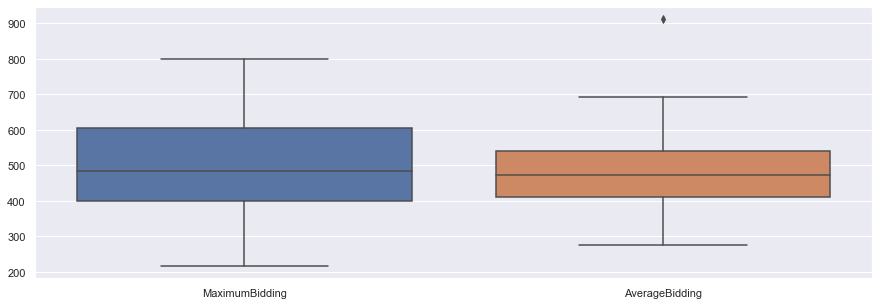

In [190]:
import seaborn as sns
sns.boxplot(data = Group_AB);

## INDEPENDENT SAMPLE T TEST (AB TEST)

In [191]:
Group_AB.head()

,MaximumBidding,AverageBidding
0,383,913
1,644,510
2,639,391
3,649,434
4,455,492


## ASSUMPTION CONTROL
### Normality
+ HO: Sample is normally distributed
+ H1: Sample is not normally distributed

In [192]:
from scipy.stats import shapiro
print(shapiro(Group_AB.MaximumBidding))
print(shapiro(Group_AB.AverageBidding))

(0.9855586290359497, 0.9514130353927612)
(0.9096213579177856, 0.01678052917122841)


Since the p value for the group MaximumBidding is greater than 0.05, the null hpothesis that the sample is normally distributed can not be rejected. 

However, for the group AverageBidding, since our p value is less than 0.05, the null hypotesis is rejected which means that sample is not normally distributed

### Variance Homogeneity
+ HO: The variance is equal across groups
+ H1: the variance is not equal across groups

In [193]:
test_statistic, pvalue = stats.levene(Group_AB.MaximumBidding, Group_AB.AverageBidding) 
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistics = 1.7952, p-value = 0.1857


Our p value(0.185) greater than .05 indicates that the variance assumption across groups is met. 

## THE MANN WHITNEY U TEST
Since a violation related to the normality of group AverageBidding occurs, conducting the non-parametric equivalent of the analysis is more appropriate.

In [194]:
stats.mannwhitneyu(Group_AB["MaximumBidding"], Group_AB["AverageBidding"])
test_statistic, pvalue = stats.mannwhitneyu(Group_AB["MaximumBidding"], Group_AB["AverageBidding"])
print('Test Statistics = %.4f, p-value = %.4f' % (test_statistic, pvalue))

Test Statistics = 361.0000, p-value = 0.1794


Since we found our p value greater than 0.05, we can not reject the null hypothesis. 

Therefore, our conclusion is that there is no statistically significance difference between avrage bidding and maximum bidding in terms of number of purchase. 

## FEATURE ENGINEERING

In [195]:
df_c["Website Click Through Rate"] = df_c["# of Website Clicks"] / df_c["# of Impressions"] * 100
df_t["Website Click Through Rate"] = df_t["# of Website Clicks"] / df_t["# of Impressions"] * 100

df_c["ContentView_Purchase_Ratio"] = df_c["# of View Content"] / df_c["# of Purchase"]
df_t["ContentView_Purchase_Ratio"] = df_t["# of View Content"] / df_t["# of Purchase"]

df_c["Cost per Action"] = df_c["Spend [USD]"] / df_c["ContentView_Purchase_Ratio"]
df_t["Cost per Action"] = df_t["Spend [USD]"] / df_t["ContentView_Purchase_Ratio"]

df_c["Conversion Rate"] = df_c["ContentView_Purchase_Ratio"] / df_c["# of Website Clicks"] * 100
df_t["Conversion Rate"] = df_t["ContentView_Purchase_Ratio"] / df_t["# of Website Clicks"] * 100

In [196]:
df_c_final = df_c[["Website Click Through Rate", "ContentView_Purchase_Ratio", "Cost per Action", "Conversion Rate"]]
df_t_final = df_t[["Website Click Through Rate", "ContentView_Purchase_Ratio", "Cost per Action", "Conversion Rate"]]

df_c_final["Group"] = "MaximumBidding"
df_t_final["Group"] = "AverageBidding"
group_ct = pd.concat([df_c_final,df_t_final])

In [197]:
group_ct["Group"].value_counts()

AverageBidding    29
MaximumBidding    29
Name: Group, dtype: int64

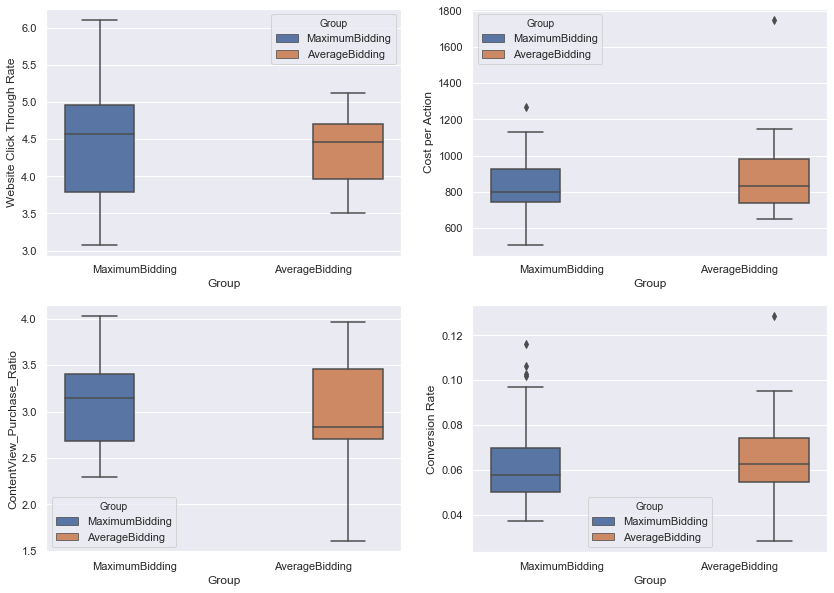

In [198]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(y='Website Click Through Rate', x = 'Group', hue = 'Group', data = group_ct, ax=axarr[0][0])
sns.boxplot(y='ContentView_Purchase_Ratio', x = 'Group', hue = 'Group', data = group_ct, ax=axarr[1][0])
sns.boxplot(y='Cost per Action', x = 'Group', hue = 'Group', data = group_ct, ax=axarr[0][1])
sns.boxplot(y='Conversion Rate', x = 'Group', hue = 'Group', data = group_ct, ax=axarr[1][1]);


In [199]:
AB = pd.concat([df_c, df_t], axis = 0)
AB.reset_index(drop=True,inplace=True)
AB.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Website Click Through Rate,ContentView_Purchase_Ratio,Cost per Action,Conversion Rate
0,Control Campaign,2017.01.01,2436.124529,90572,75440,4150,1657,1541,566,383,4.581990,4.023499,605.474169,0.096952
1,Control Campaign,2017.01.02,2621.043006,129612,95667,6387,2265,1563,1577,644,4.927784,2.427019,1079.943504,0.037999
2,Control Campaign,2017.01.03,2427.021083,132803,121762,6887,3100,2048,1381,639,5.185877,3.205008,757.259020,0.046537
3,Control Campaign,2017.01.04,2565.414978,120570,104011,6478,2579,2083,1650,649,5.372812,3.209553,799.305963,0.049545
4,Control Campaign,2017.01.05,2648.683326,95822,69059,4532,1823,1220,940,455,4.729603,2.681319,987.828617,0.059164


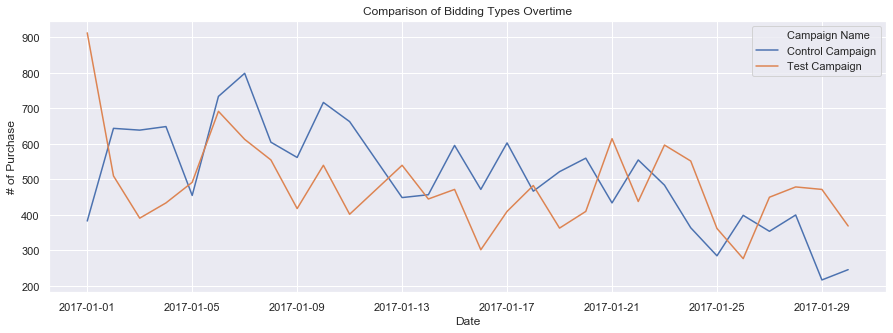

In [200]:
AB['Date'] = pd.to_datetime(AB['Date'],infer_datetime_format=True)

sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(data=AB, x='Date', hue='Campaign Name', y='# of Purchase').set_title('Comparison of Bidding Types Overtime');

# CONCLUSION

Even though equal variance assuption across groups is met, since a violation related to the normality of group AverageBidding occurs, conducting the non-parametric equivalent of the analysis is more appropriate. 

Therefore, Mann Withney U Test was performed to evaluate whether there is statistically significance difference between avrage bidding and maximum bidding in terms of number of purchase.

P value with a value of 0.1794 is greater than 0.05, we can not reject the null hypothesis. Therefore, we found that there is no statistically significance difference between avrage bidding and maximum bidding in terms of number of purchase. 

It seems that there is no need to take actions in favor of one bidding process according to statistical analysis results. 

Hovewer, comparison of Bidding Types figure indicates that the number of purchases start to increase in average bidding type starting the 20th day.

Based on this trend line, it is more likely to see these differences in the following days or months. Therefore, It would be a wise decision to keep the testing for a feasible time in order to make a decision. 
